In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch as th
import munch

In [2]:
n = 500
x0 = th.linspace(-4.0 * np.pi, 4.0 * np.pi, n)[:, None]
g0 = th.sin(x0) / x0

In [3]:
x = x0.clone() + th.randn((n, 1)) * 0.15
g = g0.clone() + th.randn((n, 1)) * 0.15

In [43]:
x0 -= x.mean()
x0 /= x.std()

x -= x.mean()
x /= x.std()

g0 -= g.mean()
g0 /= g.std()

g -= g.mean()
g /= g.std()

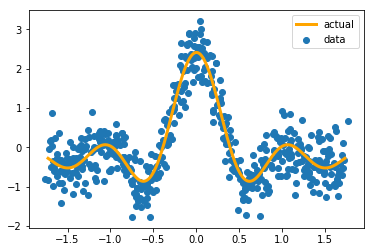

In [44]:
plt.scatter(x, g, label='data');
plt.plot(x0, g0, color='orange', linewidth=3, label='actual');
plt.legend();

<img src="ann.svg" style="width: 400px; margin-left: 0px;"/>

In [62]:
class ForwardNetwork(th.nn.Module):
    def __init__(self, indim, outdim, nhidden, transfer=th.nn.Tanh):
        super().__init__()
        self.indim, self.outdim = indim, outdim
        self.nhidden = nhidden

        hidden_proj = th.nn.Linear(self.indim, self.nhidden)
        hidden_transfer = transfer()
        self.hidden = th.nn.Sequential(hidden_proj, hidden_transfer)

        self.visible = th.nn.Linear(nhidden, self.outdim)

    def forward(self, x):
        return self.visible(self.hidden(x))

    def fit(self, x, g, maxiter=600):
        self.train()

        loss_func = th.nn.MSELoss(reduction='mean')
        optimizer = th.optim.Rprop(self.parameters())
        train_losses = []

        for i in range(maxiter):
            optimizer.zero_grad()

            y = self(x)
            loss = loss_func(y, g)

            train_losses.append(loss.item())
            if i % 100 == 0:
                print(i, train_losses[-1])

            loss.backward()
            optimizer.step()
            
        self.eval()

        return munch.munchify({
            'train_losses': train_losses
        })

In [90]:
model = ForwardNetwork(1, 1, nhidden=10)

In [91]:
result = model.fit(x, g, maxiter=600)

0 1.0572551488876343
100 0.24482391774654388
200 0.18885092437267303
300 0.1785513311624527
400 0.17729170620441437
500 0.17659567296504974


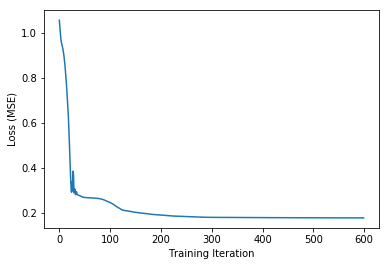

In [92]:
plt.plot(result.train_losses);
plt.xlabel('Training Iteration');
plt.ylabel('Loss (MSE)');

In [93]:
y = model(x).detach()

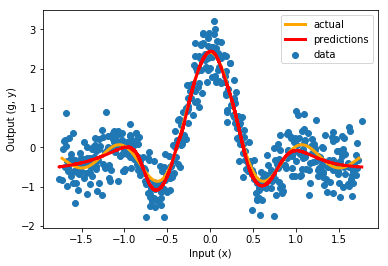

In [94]:
plt.scatter(x, g, label='data');
plt.plot(x0, g0, color='orange', linewidth=3, label='actual');
plt.plot(x, y, color='red', linewidth=3, label='predictions');
plt.legend();
plt.xlabel('Input (x)');
plt.ylabel('Output (g, y)');